## Assignment

### Part I

#### Clean your data

+ Read in temp_data.txt
    + It won't be easy! You'll need to find a way to clean the data
    + Try opening the file in a text editor first
+ Read in temp_X.csv
+ Merge the X variable from temp_X with the data from temp_data
+ Note that we discussed this in class, but it's something you'll just need to practice on your own. 
+ You will struggle with this and it's ok
+ Check out the documentation for read_csv() in the pandas package


### Part II

#### Run a linear regression
+ Using X to predict temperature 
+ Interpret your coefficients!
+ What is one potential use for this linear regression equation? 
+ What does this linear regression mean? 
+ Is this a good model? Why or why not? 

    


In [48]:
outF = open('output.txt', 'w') #opens a file in write mode
clue = open(r'C:\GIT\DS-SF-32\lessons\lesson-5\temp_data.txt') #opens the file in read mode
a=0
#below set of code remove the lines starting with %, and writes the remaining onces to output.txt
for line in clue:
    if re.search('^%', line):
        continue
    else:
        outF.write(line)
        outF.write('\n')


In [43]:
# after the above step is executed, i went to output.txt and replaced the commas on the first row with tabs, thereby creating a near dataframe
# if you run the above line, and then this line, the output.txt file will be different. Instead, ingnore the above line and run the code from this line onwards
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
vin = pd.read_table('output.txt')
vin = pd.DataFrame(vin)
vin[['Station ID', 'Series Number', 'Observations', 'Time of Observation ']] = vin[['Station ID', 'Series Number', 'Observations', 'Time of Observation ']].astype(np.int8)
vin[['Date','Temperature (C)', 'Uncertainty (C)']] = vin[['Date','Temperature (C)', 'Uncertainty (C)']].astype(np.float32)
vin = vin.rename(columns={'Station ID': 'Station_ID', 'Series Number': 'Series_Number'})
vin.round({'Date':2})
vin.head()

,Station_ID,Series_Number,Date,Temperature (C),Uncertainty (C),Observations,Time of Observation
0,54,1,1986.708008,26.611000,0.0507,30,24
1,54,1,1986.875000,27.593000,0.0507,30,24
2,54,1,1986.958008,28.226000,0.0499,31,24
3,54,1,1987.041992,27.580999,0.0499,31,24
4,54,1,1987.125000,27.996000,0.0525,28,24


In [44]:
din = pd.read_csv(r'C:\GIT\DS-SF-32\lessons\lesson-5\temp_X.csv')
din = pd.DataFrame(din)
din.head()
din[['Unnamed: 0', 'Station_ID', 'Series_Number']] = din[['Unnamed: 0', 'Station_ID', 'Series_Number']].astype(np.int8) #convert to integer to save processing memory
din[['Date', 'X']] = din[['Date', 'X']].astype(np.float32) #convert to float32 to save memory

In [45]:
din.head()

,Unnamed: 0,Station_ID,Series_Number,Date,X
0,0,54,1,1986.708008,79.899803
1,1,54,1,1986.875000,81.667397
2,2,54,1,1986.958008,82.806801
3,3,54,1,1987.041992,81.645798
4,4,54,1,1987.125000,82.392799


In [6]:
#merge dataframe vin and din with common index
res = {}
res = pd.merge(vin, din, left_index=True, right_index=True, how='inner')

In [46]:
res.head()

,Station_ID_x,Series_Number_x,Date_x,Temperature (C),Uncertainty (C),Observations,Time of Observation,Unnamed: 0,Station_ID_y,Series_Number_y,Date_y,X
0,54,1,1986.708008,26.611000,0.0507,30,24,0,54,1,1986.708008,79.899803
1,54,1,1986.875000,27.593000,0.0507,30,24,1,54,1,1986.875000,81.667397
2,54,1,1986.958008,28.226000,0.0499,31,24,2,54,1,1986.958008,82.806801
3,54,1,1987.041992,27.580999,0.0499,31,24,3,54,1,1987.041992,81.645798
4,54,1,1987.125000,27.996000,0.0525,28,24,4,54,1,1987.125000,82.392799


In [8]:
res.info() #confirming that the new table has the same number of rows as vin and din

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141637 entries, 0 to 141636
Data columns (total 12 columns):
Station_ID_x            141637 non-null int8
Series_Number_x         141637 non-null int8
Date_x                  141637 non-null float32
Temperature (C)         141637 non-null float32
Uncertainty (C)         141637 non-null float32
Observations            141637 non-null int8
Time of Observation     141637 non-null int8
Unnamed: 0              141637 non-null int8
Station_ID_y            141637 non-null int8
Series_Number_y         141637 non-null int8
Date_y                  141637 non-null float32
X                       141637 non-null float32
dtypes: float32(5), int8(7)
memory usage: 3.6 MB


In [48]:
#run linear regression
import statsmodels.formula.api as smf
X = res['X']
y = res['Temperature (C)']
lm = smf.ols(formula='y ~ X', data=res).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.914e+21
Date:                Mon, 06 Mar 2017   Prob (F-statistic):               0.00
Time:                        21:15:20   Log-Likelihood:             1.7257e+06
No. Observations:              141637   AIC:                        -3.451e+06
Df Residuals:                  141635   BIC:                        -3.451e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -17.7778   3.37e-09  -5.27e+09      0.000       -17.778   -17.778
X              0.5556   1.27e-11   4.37e+10      0.000         0.556     0.556
==============================================================================
Omnibus:                   433860.937   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     234003934104.079
Skew:                          45.673   Prob(JB):                         0.00
Kurtosis:                    6299.267   Cond. No.                         273.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>


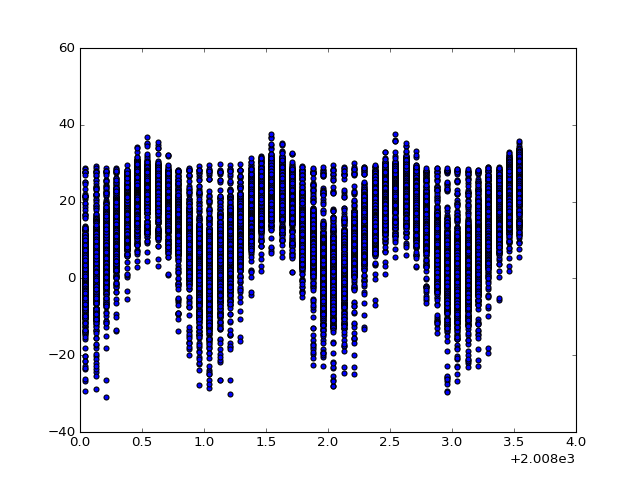

[2008, 2012, -40, 60]

In [41]:
#plot the relationship with temperature over date_x
%matplotlib notebook
fig = plt.figure()
plt.scatter(X,y)
plt.axis([2008, 2012, -40, 60])


In [47]:
Using X to predict temperature
Neel - I ran X to predict y, got a coefficient of 1.0, which seems unreal

Interpret your coefficients!
Neel - Coefficient of X is 0.5, this means that for 1 increase in Temperature (C), X will change by 0.5.

What is one potential use for this linear regression equation?
Neel - Identify contributors to global warming

What does this linear regression mean?
Neel - Independent variables are not very well correlated to the dependent variable Temperature (C)

Is this a good model? Why or why not?
Neel- I plotted the relationship between year and temperature (C). The graph above shows a pattern that does not come close to what I would expect of a linear regression model
Hence, this model is not very good for predicting temperature.

SyntaxError: invalid syntax (<ipython-input-47-d573281836c0>, line 1)